<a href="https://colab.research.google.com/github/powersurge8891/Dimension-Reduction/blob/main/Manifold_Learing_House_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data and libraries

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/5. Dimension Reduction

/content/drive/MyDrive/Data Mining for Business in Python/5. Dimension Reduction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('house_rent.csv')

#Exploring data

In [4]:
copy_data=data.copy()

In [5]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,acept,furnished,8000
1,0,64,2,1,1,10,acept,not furnished,820
2,1,443,5,5,4,3,acept,furnished,7000
3,1,73,2,2,1,12,acept,not furnished,1250
4,1,19,1,1,0,0,not acept,not furnished,1200


In [6]:
np.unique(data.animal)

array(['acept', 'not acept'], dtype=object)

In [7]:
np.unique(data.furniture)

array(['furnished', 'not furnished'], dtype=object)

In [8]:
data.animal= pd.get_dummies(data.animal, drop_first=True)

In [9]:
data.furniture= pd.get_dummies(data.furniture, drop_first=True)

In [10]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,0,0,8000
1,0,64,2,1,1,10,0,1,820
2,1,443,5,5,4,3,0,0,7000
3,1,73,2,2,1,12,0,1,1250
4,1,19,1,1,0,0,1,1,1200


In [11]:
data.isna().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
rent amount       0
dtype: int64

#Correlation Matrix

In [12]:
X= data.drop(columns='rent amount')

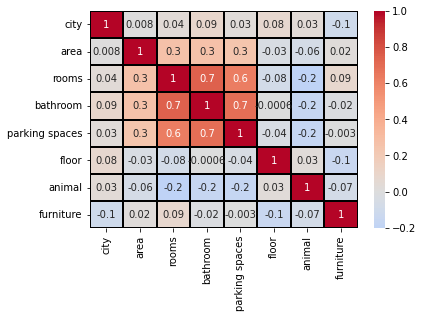

In [13]:
import seaborn as sns
sns.heatmap(X.corr(),fmt='.1g',
            annot=True,
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black'
)

#there is high correlation among our predictors, which is not good (which means that some predictors can represent others
# without having all of them there.)

#t-SNE

In [16]:
from sklearn.manifold import TSNE
model= TSNE( n_components=2, random_state=285) # note that t_SNE deos have means of selecting the best components

components= model.fit_transform(X) #you don't need to standardize data in t-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [16]:
#Also note that one ofthe major cons of t-SNE is computing issue. it takes longer time.
#t-distributor Stochaistaic Neighbor Embedding (t-SNE)


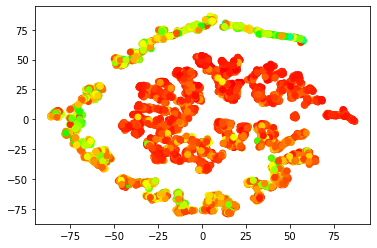

In [20]:
plt.scatter(components[:, 0], 
         components[:, 1],
         cmap= 'hsv',
         c=data['rent amount'] )